## Laboratorio. Árboles y random forest para clasificación

## Librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [2]:
semilla_aleatoria = 1234

# 1.- Leer los datos del archivo pima-indians-diabetes.csv

In [3]:
df_base=pd.read_csv("pima-indians-diabetes.csv")

display(df_base.head(5))

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_base.shape

(768, 9)

In [5]:
df_base[(df_base['diabetes']==1)]

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [6]:
df_base.dtypes

nEmbarazos                    int64
concentracionGlucosa          int64
presionArterialSistolica      int64
pliegueCutaneo                int64
insulinaSerica                int64
IMC                         float64
funcionPediDiabe            float64
edad                          int64
diabetes                      int64
dtype: object

# 2.- Análisis exploratorio de los datos
## **2.1. Escriba el código que permita crear los histogramas de todas las variables:**

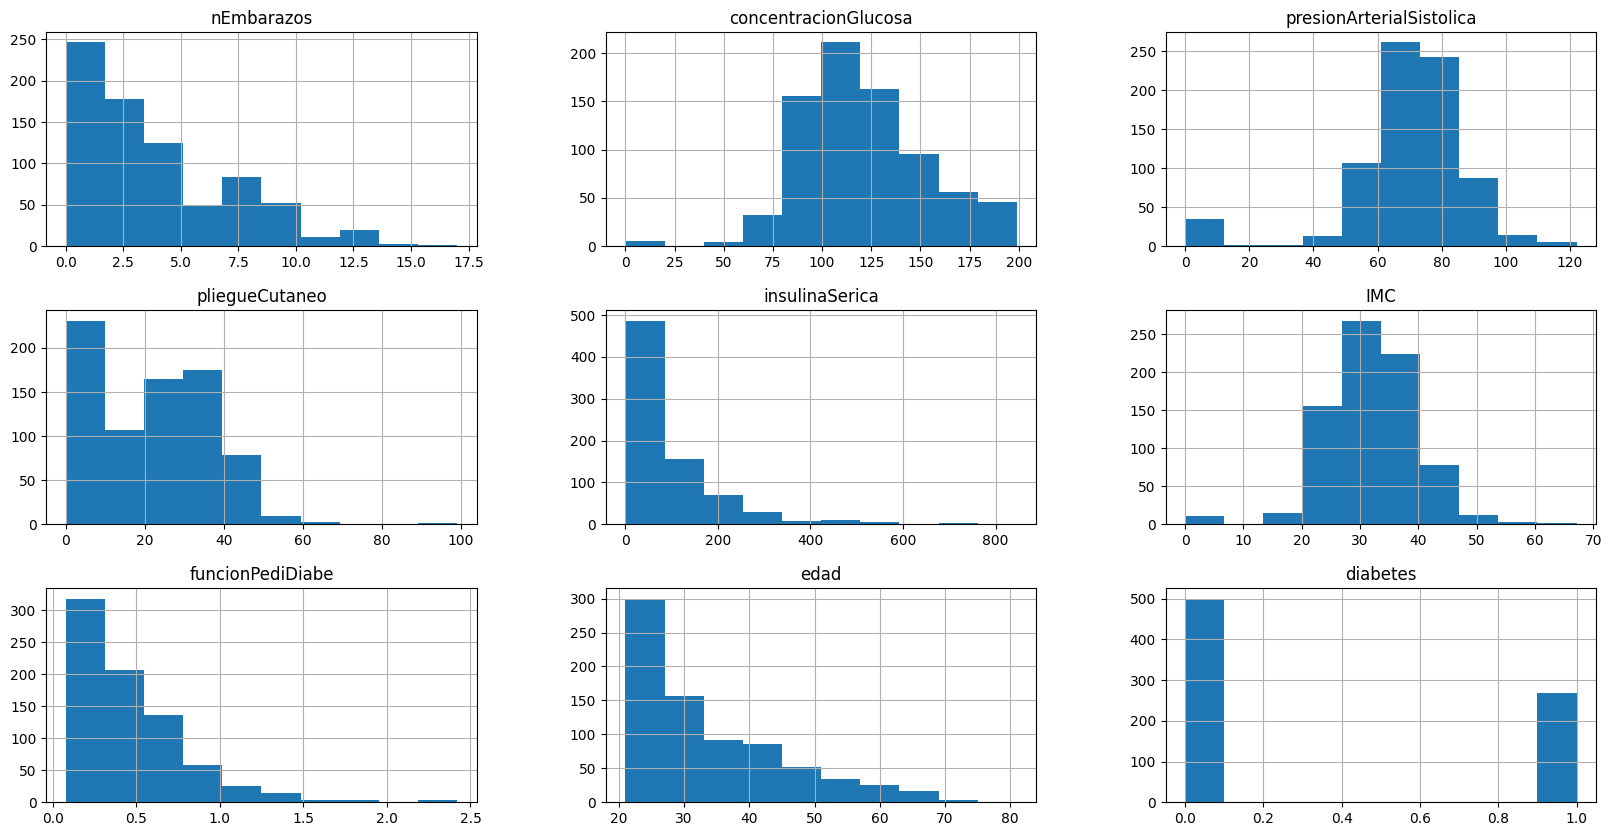

In [7]:
plt.rcParams['figure.figsize'] = [20, 10];
df_base.hist()
plt.show()
# Dibujar histogramas de todos los atributos
# Respuesta B

In [8]:
df_base.describe()


,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df_base.head(20)

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,pliegueCutaneo,insulinaSerica,IMC,funcionPediDiabe,edad,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


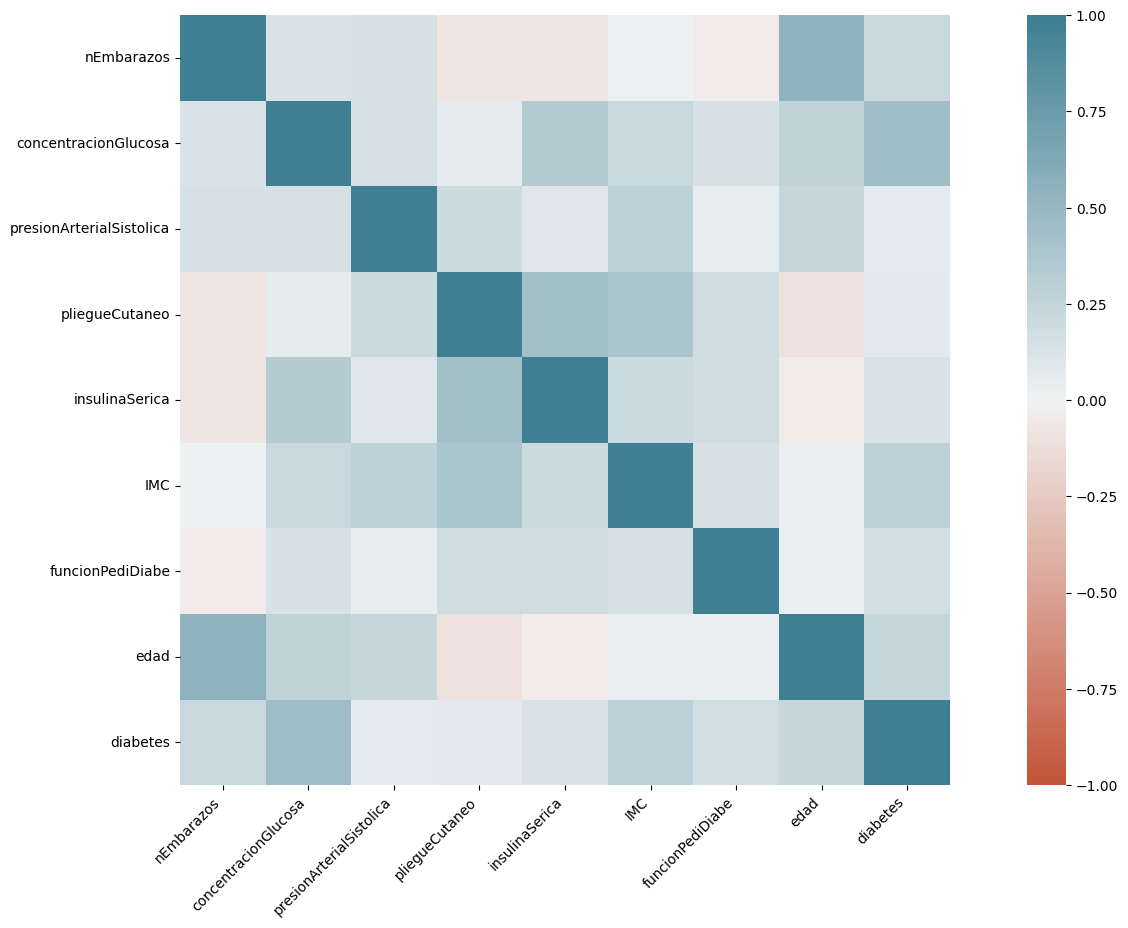

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr= df_base.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# 3.- Tratamiento de missing. 

Antes de realizar cualquier evaluación sobre los datos es importante siempre realizar un tratamiento previo con el fin de abordar el problema de los datos faltantes. Se citan algunos ejemplos: 
* Si la cantidad de datos faltantes es muy grande se recomienda borrar estas variables.
* Si existe una cantidad pequeña de filas con datos faltantes en sus variables se puede optar por borrarlas.
* Para variables categóricas se puede agregar un estado adicional que describa este factor.
* Se puede llenar los datos faltantes con la media, mediana o moda de la variable tanto para variables numéricas o categóricas.
* Para variables categóricas, se puede optar por una asignación aleatoria de categorías escogiendo aquellas que se encuentren presentes en esa variable, tratado de buscar que se encuentren uniformemente distribuidas.
* En ocasiones no existen valores faltantes o nulos, existen valores en cero que realmente están reflejando datos faltantes. 


## Se obtiene las columnas que tienen datos faltantes.

In [11]:
col_total_nulos = df_base.isnull().sum()
serie_col_nombres = col_total_nulos[col_total_nulos > 0]
display(serie_col_nombres)

Series([], dtype: int64)

No existen valores faltantes

## Revisar valores en cero

Si observamos el resultado del describe del análisis exploratorio de los datos, podemos ver que hay muchas columnas con valor mínimo en cero. Y no tiene mucho sentido, así que se trata de valores faltantes. Las siguientes columnas no deben tener valor en cero.

* Concentración de Glucosa
* Presión arterial diastólica
* Pliegue cutáneo en triceps
* Insulina sérica
* Indice de Masa Corporal IMC.

Si vemos las 20 primeras filas del análisis exploratorio de los datos, podemos ver ceros en la columna 3, 4 y 5. Contemos ahora los ceros que existen en cada columna del dataset.
### Sumemos los ceros por columna

In [12]:
(df_base==0).sum(axis=0)

nEmbarazos                  111
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                    500
dtype: int64

Podemos ver que las columnas 2,3 y 6 tienen pocas filas con valores en cero. Pero las columnas 4 y 5 casi la mitad de los datos están en cero. Así que necesitaremos diferentes estrategias para poder llenar los valores faltantes. 

# 4.- Manejo de valores faltantes

## **4.1. Escriba el código que permita reemplazar ceros con valores 'NAN':**

In [13]:
# Reemplazar '0' con valores 'nan' para los atributos: concentracionGlucosa, presionArterialSistolica, pliegueCutaneo, insulinaSerica e IMC
from numpy import nan
cols=['concentracionGlucosa','presionArterialSistolica','pliegueCutaneo','insulinaSerica','IMC']
df_base[cols] = df_base[cols].replace({'0':np.nan, 0:np.nan})
# Contar el número de nan por columna
print(df_base.isnull().sum())


nEmbarazos                    0
concentracionGlucosa          5
presionArterialSistolica     35
pliegueCutaneo              227
insulinaSerica              374
IMC                          11
funcionPediDiabe              0
edad                          0
diabetes                      0
dtype: int64


## Eliminar filas con valores faltantes

La estrategia más sencilla para manejar los datos faltantes es eliminar los registros que contienen un valor perdido.

Podemos hacer esto creando un nuevo Pandas DataFrame con las filas que contienen los valores faltantes

Pandas proporciona la función dropna () que se puede utilizar para eliminar columnas o filas con datos faltantes. Podemos usar dropna () para eliminar todas las filas con datos faltantes, de la siguiente manera:

In [14]:
from numpy import nan
df_base_missing_dropn=df_base.copy()
# Revisar cuántas filas y columnas tiene df_base_missing_dropn
print(df_base_missing_dropn.shape)


(768, 9)


## **4.2. Escriba el código que permita eliminar filas con valores faltantes:**

In [15]:
df_base_missing_dropn=df_base_missing_dropn.dropna()
print(df_base_missing_dropn.shape)

(392, 9)


## Eliminar columnas con un % de valores faltantes
Ahora eliminemos aquellas columnas que tienen un % de nulos mayor a un parámetro definido previamente.

In [16]:
df_base_missing_dropnColumns=df_base.copy()
perc = 25.0 # mayor al 25% de valores faltantes
min_count =  int(((100-perc)/100)*df_base_missing_dropnColumns.shape[0] + 1)
df_base_missing_dropnColumns = df_base_missing_dropnColumns.dropna( axis=1, 
                    thresh=min_count)

In [17]:
df_base_missing_dropnColumns.shape

(768, 7)

In [18]:
df_base_missing_dropnColumns.head(20)
#Se elimina Insulina y pliegue

,nEmbarazos,concentracionGlucosa,presionArterialSistolica,IMC,funcionPediDiabe,edad,diabetes
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
5,5,116.0,74.0,25.6,0.201,30,0
6,3,78.0,50.0,31.0,0.248,26,1
7,10,115.0,NaN,35.3,0.134,29,0
8,2,197.0,70.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,0.232,54,1


## Reemplazar valores faltantes con la media
## **4.3. Escriba el código que permita reemplazar valores faltantes con la media:**

In [19]:
df_base_missing_mean=df_base.copy()
means=df_base_missing_mean.mean()
df_base_missing_mean.fillna(means,inplace=True)

In [20]:
print(df_base_missing_mean.isnull().sum())

nEmbarazos                  0
concentracionGlucosa        0
presionArterialSistolica    0
pliegueCutaneo              0
insulinaSerica              0
IMC                         0
funcionPediDiabe            0
edad                        0
diabetes                    0
dtype: int64


## Reemplazar valores faltantes con la moda
## **4.4. Escriba el código que permita reemplazar valores faltantes con la moda:**

In [21]:
df_base_missing_mode=df_base.copy()
mode=df_base_missing_mode.mode().iloc[0]
df_base_missing_mode.fillna(mode,inplace=True)
print(df_base_missing_mode.isnull().sum())

nEmbarazos                  0
concentracionGlucosa        0
presionArterialSistolica    0
pliegueCutaneo              0
insulinaSerica              0
IMC                         0
funcionPediDiabe            0
edad                        0
diabetes                    0
dtype: int64


## Reemplazar valores faltantes con una función de interpolación, usando método lineal
## **4.5. Escriba el código que permita reemplazar valores faltantes utilizando interpolación lineal:**

In [22]:
df_base_missing_interpo=df_base.copy()

df_base_missing_interpo=df_base_missing_interpo.interpolate(method='linear', limit_direction ='both')
display('Verificación de datos faltantes :{0}'.format(df_base_missing_interpo.isnull().sum().max()))

print(df_base_missing_interpo.isnull().sum())

'Verificación de datos faltantes :0'

nEmbarazos                  0
concentracionGlucosa        0
presionArterialSistolica    0
pliegueCutaneo              0
insulinaSerica              0
IMC                         0
funcionPediDiabe            0
edad                        0
diabetes                    0
dtype: int64


# 5.- Hallar todas las correlaciones existentes entre las variables numéricas del conjunto de datos.

## **5.1. Escriba el código que permita calcular las correlaciones entre las variables del dataset:**

## **5.2. Dibuje un mapa de calor donde se puedan ver las correlaciones:**

0.6482139430923206

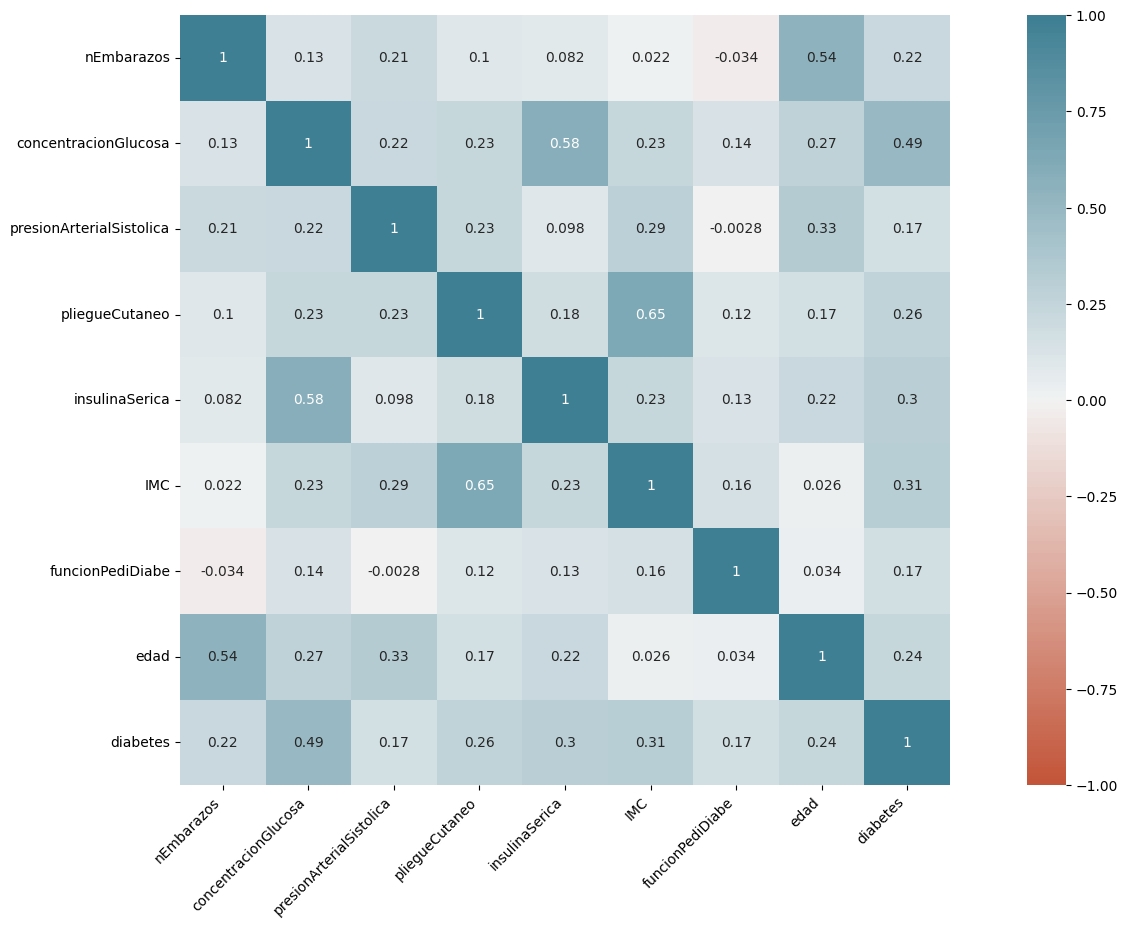

In [23]:
corr_df_base_missing_interpo= df_base.corr()
ax = sns.heatmap(
    corr_df_base_missing_interpo, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
correlation = df_base['IMC'].corr(df_base['pliegueCutaneo'])
correlation

# 6.- Aplicar Árboles de Decisión y Random Forest al dataframe donde se eliminaron todas las filas con valores faltantes

### Determinar el conjunto de modelización y el de validación
* Se segmenta los datos en dos conjuntos uno de entrenamiento con el 80% y de prueba 20% del total de datos respectivamente.

In [24]:
X = df_base_missing_dropn.drop(columns = ['diabetes']).copy()
y = df_base_missing_dropn['diabetes']
print(df_base_missing_dropn.isnull().sum())
# In the first step we will split the data in training and remaining dataset
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8, random_state=semilla_aleatoria)


nEmbarazos                  0
concentracionGlucosa        0
presionArterialSistolica    0
pliegueCutaneo              0
insulinaSerica              0
IMC                         0
funcionPediDiabe            0
edad                        0
diabetes                    0
dtype: int64


## 6.1. Pasos para aplicar árboles 
## **Escriba el código que permite entrenar un árbol de decisión con el dataset donde se eliminaron las filas con valores faltantes:**

In [25]:
modelo=DecisionTreeClassifier(max_depth=6,splitter='best',random_state=semilla_aleatoria)
modelo.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=6, random_state=1234)

Profundidad del arbol: 6
Numero de nodos terminales: 35


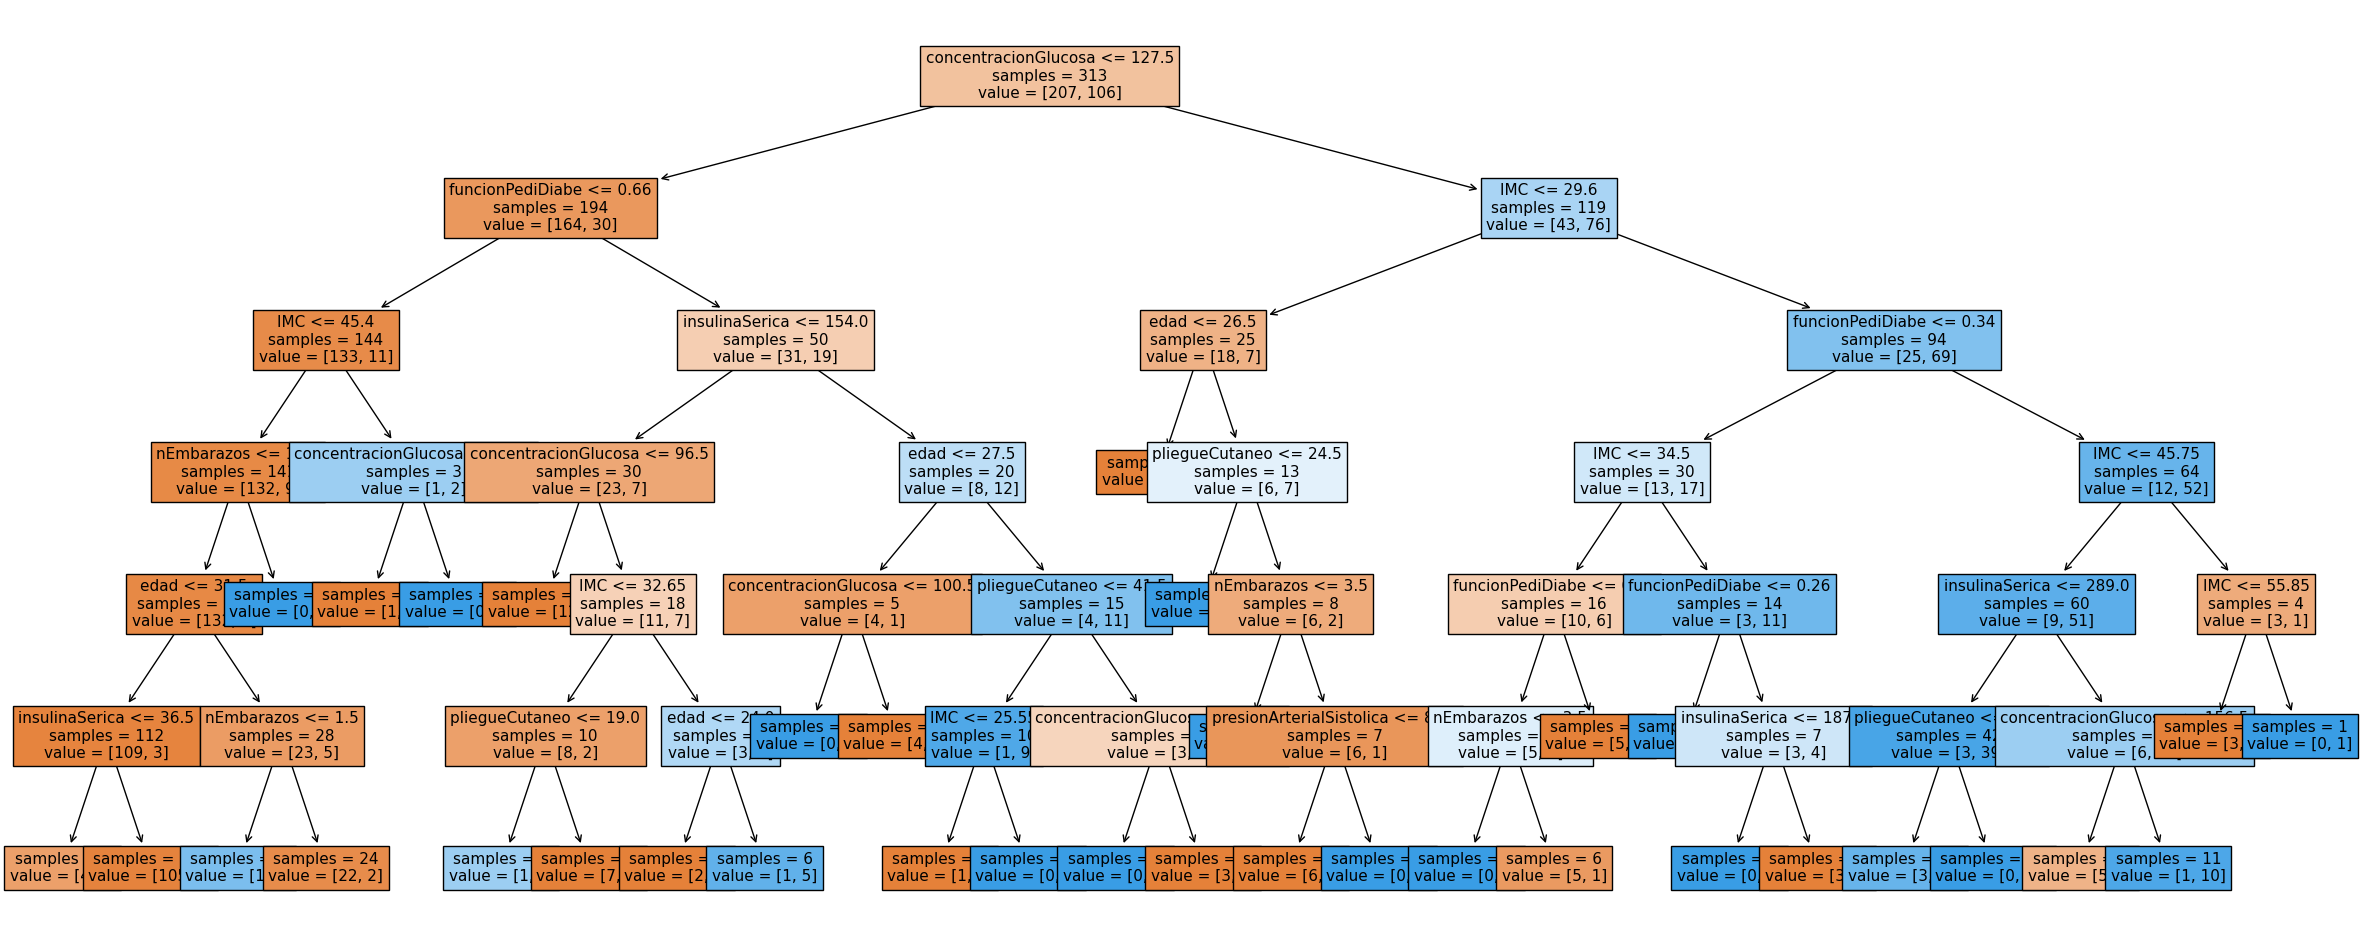

In [26]:
fig,ax=plt.subplots(figsize=(30,12))
print(f"Profundidad del arbol: {modelo.get_depth()}")
print(f"Numero de nodos terminales: {modelo.get_n_leaves()}")
plot=plot_tree(
    decision_tree=modelo,
    feature_names=test_x.columns,
    filled=True,
    impurity=False,
    fontsize=11,
    precision=2,
    ax=ax
)

## **6.2. Escriba el código que permita predecir la diabetes en el conjunto de datos de test:**

In [27]:
predEY_clas_arb=modelo.predict(test_x)

print('MAE',mean_absolute_error(test_y,predEY_clas_arb))
print('MSE',mean_squared_error(test_y,predEY_clas_arb))
print('R2',r2_score(test_y,predEY_clas_arb)) # VALOR PARA PREDECIR EL MODEL 

MAE 0.2911392405063291
MSE 0.2911392405063291
R2 -0.37651515151515214


### MÉTRICAS.
## **6.3. Utilice la función classification_report para poder ver la precisión, recall y f1 tanto para la case 0 como para la clase 1:**

In [28]:

clas_report=classification_report(test_y,predEY_clas_arb)
print(clas_report)

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        55
           1       0.52      0.58      0.55        24

    accuracy                           0.71        79
   macro avg       0.66      0.67      0.67        79
weighted avg       0.72      0.71      0.71        79



## 7. Pasos método Clasificación Random Forest
### Escriba el código que permita entrenar un algoritmo de Random Forest con la función RandomForestClassifier con 100 árboles y que se puedan entrenar 2 árboles en paralelo (n_jobs) y la semilla sea aleatoria.

In [29]:
clas_rndforest = RandomForestClassifier(n_estimators=100,n_jobs=2,random_state=semilla_aleatoria)
clas_rndforest.fit(train_x,train_y)

RandomForestClassifier(n_jobs=2, random_state=1234)

### Predicción del modelo.

In [30]:
predEY_clas_rnd=clas_rndforest.predict(test_x)

### MÉTRICAS.
## **7.1. Utilice la función classification_report para poder ver la precisión, recall y f1 tanto para la case 0 como para la clase 1:**

In [31]:
random_forest_clas_report=classification_report(test_y,predEY_clas_rnd)
print(random_forest_clas_report)

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        55
           1       0.64      0.58      0.61        24

    accuracy                           0.77        79
   macro avg       0.73      0.72      0.72        79
weighted avg       0.77      0.77      0.77        79



## 8. Aplicar Árboles de decisión con el dataframe a los que se les imputa valores con una función de interpolación

In [32]:
X = df_base_missing_interpo.drop(columns = ['diabetes']).copy()
y = df_base_missing_interpo['diabetes']

In [33]:
# In the first step we will split the data in training and remaining dataset
train_x,test_x,train_y,test_y = train_test_split(X,y, train_size=0.8, random_state=semilla_aleatoria)

## 8.1. Pasos para aplicar árboles 
### Escriba el código que permita entrenar un algoritmo de árboles de decisión con la función DecisionTreeClassifier.

In [34]:
clas_arboles = DecisionTreeClassifier(max_depth=6,splitter='best',random_state=semilla_aleatoria)
clas_arboles.fit(train_x,train_y)

DecisionTreeClassifier(max_depth=6, random_state=1234)

### Predicción del modelo.

In [35]:
predEY_clas_arb=clas_arboles.predict(test_x)

### MÉTRICAS.
## **8.2. Utilice la función classification_report para poder ver la precisión, recall y f1 tanto para la case 0 como para la clase 1:**

In [36]:
display(confusion_matrix(test_y,predEY_clas_arb))
class_report=classification_report(test_y,predEY_clas_arb)
print(class_report)

array([[73, 26],
       [27, 28]], dtype=int64)

              precision    recall  f1-score   support

           0       0.73      0.74      0.73        99
           1       0.52      0.51      0.51        55

    accuracy                           0.66       154
   macro avg       0.62      0.62      0.62       154
weighted avg       0.65      0.66      0.66       154



## 9. Aplicar Random Forest con el dataframe a los que se les imputa valores con una función de interpolación
### 9.1. Escriba el código que permita entrenar un algoritmo de Random Forest con la función RandomForestClassifier con 100 árboles y que se puedan entrenar 2 árboles en paralelo (n_jobs) y la semilla sea aleatoria.

In [37]:
clas_rndforest = RandomForestClassifier(n_estimators=100,n_jobs=2,random_state=semilla_aleatoria)
clas_rndforest.fit(train_x,train_y)

RandomForestClassifier(n_jobs=2, random_state=1234)

### Predicción del modelo.

In [38]:
predEY_clas_rnd=clas_rndforest.predict(test_x)

### MÉTRICAS.
## **9.2. Utilice la función classification_report para poder ver la precisión, recall y f1 tanto para la case 0 como para la clase 1:**

In [39]:
class_report2=classification_report(test_y,predEY_clas_rnd)
print(class_report2)

              precision    recall  f1-score   support

           0       0.79      0.89      0.83        99
           1       0.74      0.56      0.64        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.76       154

